In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))
import jReversion as jR
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import networkx as nx

In [3]:
#load data
# network_name_list= [Grieco, TLGLNetwork, bauer, ERBB, fibroblast, saez, BLT, colitis_jijoo, prostate]
Model = jR.grieco()
BooleanRuleFileName = '../' + Model['BooleanRule_filename']
network_name = Model['network_name']

NumInputs = Model['num_inputs']
NumInputConditions = Model['num_input_conditions']

InputConditions = Model['input_conditions']

OutputNodes = Model['output_nodes']
InputNodes = Model['input_nodes']

# Set parameters
# Note the node name for Gread is the index (integer), one can encode the nodename by adding prefix and suffix
# If the node name from the input file is not this simple, one need to create a dictionary to record the mapping
Prefix, Suffix = 'n', 'n'

TempI = jR.initialize(BooleanRuleFileName, Prefix, Suffix)
Mapping = TempI['mapping']
InverseMapping = TempI['inverse_mapping']
GRead = TempI['Gread']
ReadNodes = TempI['read_nodes']
if Model['reduction_required']:
    GRead = BDOIp.Get_reduced_network(GRead)

CutOffRange = [3, 4, 5, 6, 7]
GRead.remove_edges_from(list(nx.selfloop_edges(GRead)))

table_original_network = pd.read_csv('../data/' + network_name + '_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
# table_original_network = table_original_network.sort_values(by='node')
# ffl_test = pd.read_csv('../data/' + network_name + '_ffl_test.tsv', sep='\t').sort_values(by='node').set_index('node')
# canalizing_test = pd.read_csv('../data/' + network_name + '_canalizing_check_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')

print(table_original_network.head())
GLabel = nx.DiGraph()
GLabel.add_edges_from(GRead.edges())
GLabel = nx.relabel_nodes(GLabel, ReadNodes)

     Class  Canalizing  UnreachableEffective   FFL2   FFL3   FFL4   FFL5  \
node                                                                       
AKT     C1        True                  True  False  False  False  False   
AP1     C1        True                 False  False  False  False  False   
ATF2    C0       False                 False   True   True   True   True   
ATM     C0       False                 False  False  False  False  False   
BCL2    C1        True                  True   True   True   True   True   

       FFL6   FFL7  FBL  
node                     
AKT   False  False    0  
AP1   False  False    0  
ATF2   True   True    0  
ATM   False  False    0  
BCL2   True   True    0  


In [73]:
# indegree_srs = pd.Series(nx.in_degree_centrality(GLabel))
indegree_srs = pd.Series(dict(GLabel.in_degree))
table_original_network['indegree'] = indegree_srs
# outdegree_srs = pd.Series(nx.out_degree_centrality(GLabel))
outdegree_srs = pd.Series(dict(GLabel.out_degree))
table_original_network['outdegree'] = outdegree_srs
betweenness_srs = pd.Series(nx.betweenness_centrality(GLabel))
table_original_network['betweenness'] = betweenness_srs
closness_srs = pd.Series(nx.closeness_centrality(GLabel))
table_original_network['closness'] = closness_srs
print(table_original_network.head())

     Class  Canalizing  UnreachableEffective   FFL2   FFL3   FFL4   FFL5  \
node                                                                       
AKT     C1        True                  True  False  False  False  False   
AP1     C1        True                 False  False  False  False  False   
ATF2    C0       False                 False   True   True   True   True   
ATM     C0       False                 False  False  False  False  False   
BCL2    C1        True                  True   True   True   True   True   

       FFL6   FFL7  FBL  indegree  outdegree  betweenness  closness  \
node                                                                  
AKT   False  False    0         2          6     0.126533  0.176210   
AP1   False  False    0         3          1     0.094583  0.191834   
ATF2   True   True    0         2          1     0.013889  0.173077   
ATM   False  False    0         1          2     0.016968  0.019231   
BCL2   True   True    0         2        

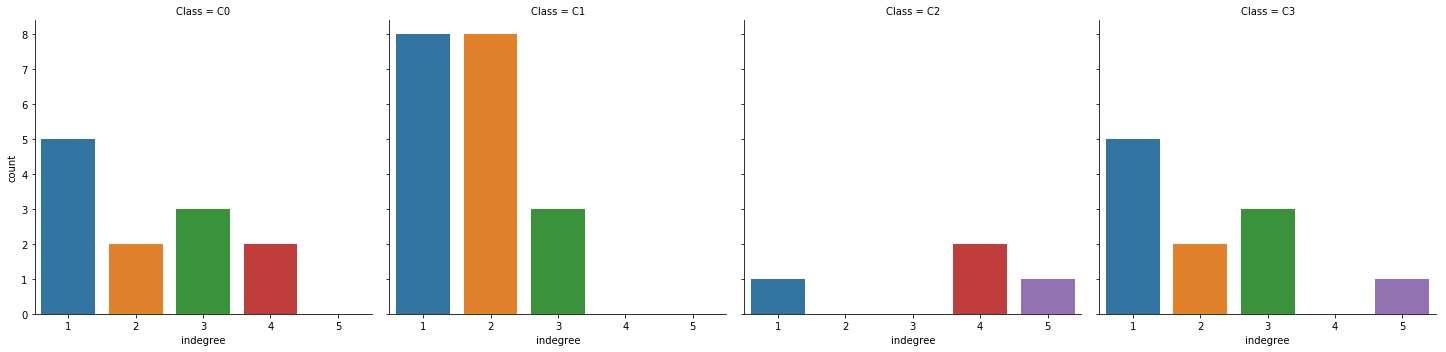

In [69]:
g = sns.catplot(x='indegree', col='Class', data=table_original_network.sort_values('Class'), kind='count')
# f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)
# g = sns.distplot(table_original_network[table_original_network['Class']=='C0']['indegree'], ax=axes[0,0], kde=False)
# g = sns.distplot(table_original_network[table_original_network['Class']=='C1']['indegree'], ax=axes[0,1])
# g = sns.distplot(table_original_network[table_original_network['Class']=='C2']['indegree'], ax=axes[1,0])
# g = sns.distplot(table_original_network[table_original_network['Class']=='C3']['indegree'], ax=axes[1,1])

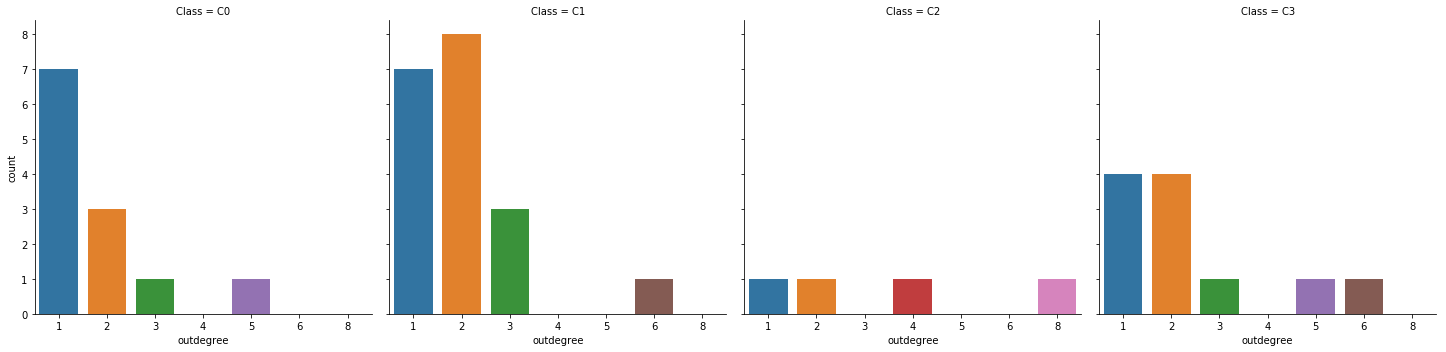

In [70]:
sns.catplot(x='outdegree', col='Class', data=table_original_network.sort_values('Class'), kind='count')

In [83]:
print(table_original_network.loc[table_original_network['Class']=='C0']['indegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C1']['indegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C2']['indegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C3']['indegree'].mean())

print(table_original_network.loc[table_original_network['Class']=='C0']['outdegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C1']['outdegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C2']['outdegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C3']['outdegree'].mean())

2.1666666666666665
1.736842105263158
3.5
2.090909090909091
1.75
2.0
3.75
2.3636363636363638


Text(0.5, 1.0, 'C3')

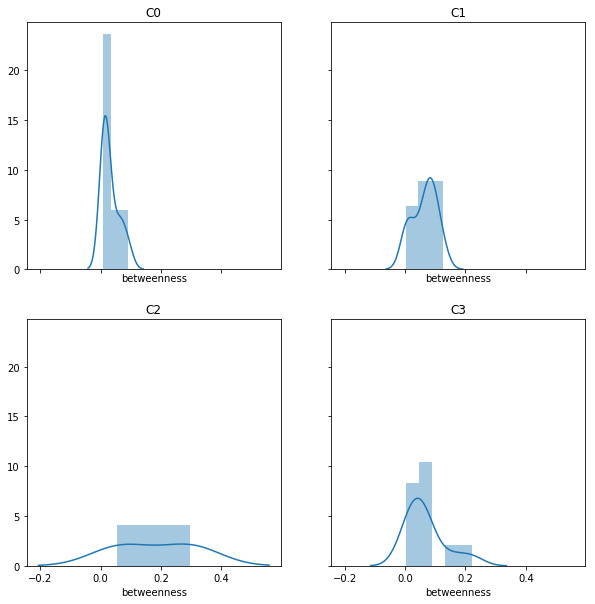

In [80]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
g = sns.distplot(table_original_network[table_original_network['Class']=='C0']['betweenness'], ax=axes[0,0])
g.set_title('C0')
g = sns.distplot(table_original_network[table_original_network['Class']=='C1']['betweenness'], ax=axes[0,1])
g.set_title('C1')
g = sns.distplot(table_original_network[table_original_network['Class']=='C2']['betweenness'], ax=axes[1,0])
g.set_title('C2')
g = sns.distplot(table_original_network[table_original_network['Class']=='C3']['betweenness'], ax=axes[1,1])
g.set_title('C3')

Text(0.5, 1.0, 'C3')

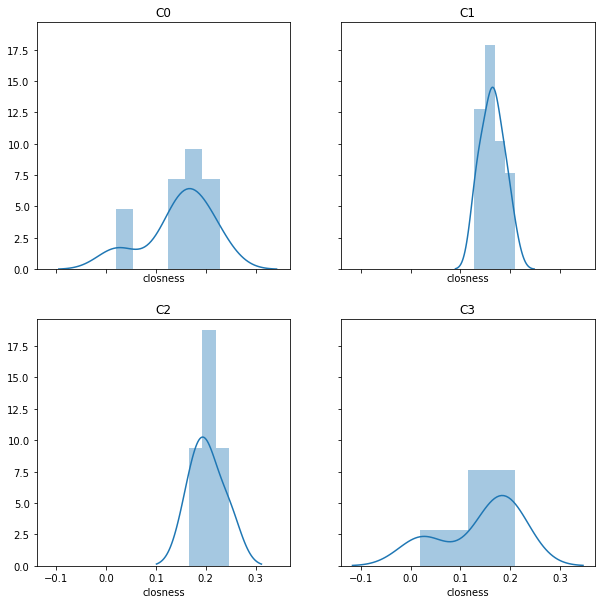

In [81]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
g = sns.distplot(table_original_network[table_original_network['Class']=='C0']['closness'], ax=axes[0,0])
g.set_title('C0')
g = sns.distplot(table_original_network[table_original_network['Class']=='C1']['closness'], ax=axes[0,1])
g.set_title('C1')
g = sns.distplot(table_original_network[table_original_network['Class']=='C2']['closness'], ax=axes[1,0])
g.set_title('C2')
g = sns.distplot(table_original_network[table_original_network['Class']=='C3']['closness'], ax=axes[1,1])
g.set_title('C3')

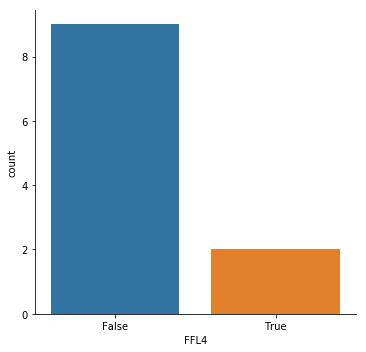

In [40]:
sns.catplot(x='FFL4', data=table_original_network.loc[table_original_network['Class']=='C3'], kind='count')

In [53]:
ffl_test = pd.read_csv('../data/' + network_name + '_ffl_test.tsv', sep='\t').sort_values(by='node')
ffl_test_reshape = pd.melt(ffl_test, id_vars='node').set_index('node')
print(ffl_test_reshape.head())
test = table_original_network.join(ffl_test_reshape, how='left')
print(test.head())

         variable  value
node                    
AKT   FFL_Inter_2  False
AP1   FFL_Inter_2  False
ATF2  FFL_Inter_2   True
ATM   FFL_Inter_2  False
BCL2  FFL_Inter_2   True
     Class  Canalizing  UnreachableEffective   FFL2   FFL3   FFL4   FFL5  \
node                                                                       
AKT     C1        True                  True  False  False  False  False   
AKT     C1        True                  True  False  False  False  False   
AKT     C1        True                  True  False  False  False  False   
AKT     C1        True                  True  False  False  False  False   
AKT     C1        True                  True  False  False  False  False   

       FFL6   FFL7  FBL  indegree  outdegree     variable  value  
node                                                              
AKT   False  False    0         2          6  FFL_Inter_2  False  
AKT   False  False    0         2          6  FFL_Inter_3  False  
AKT   False  False    0 

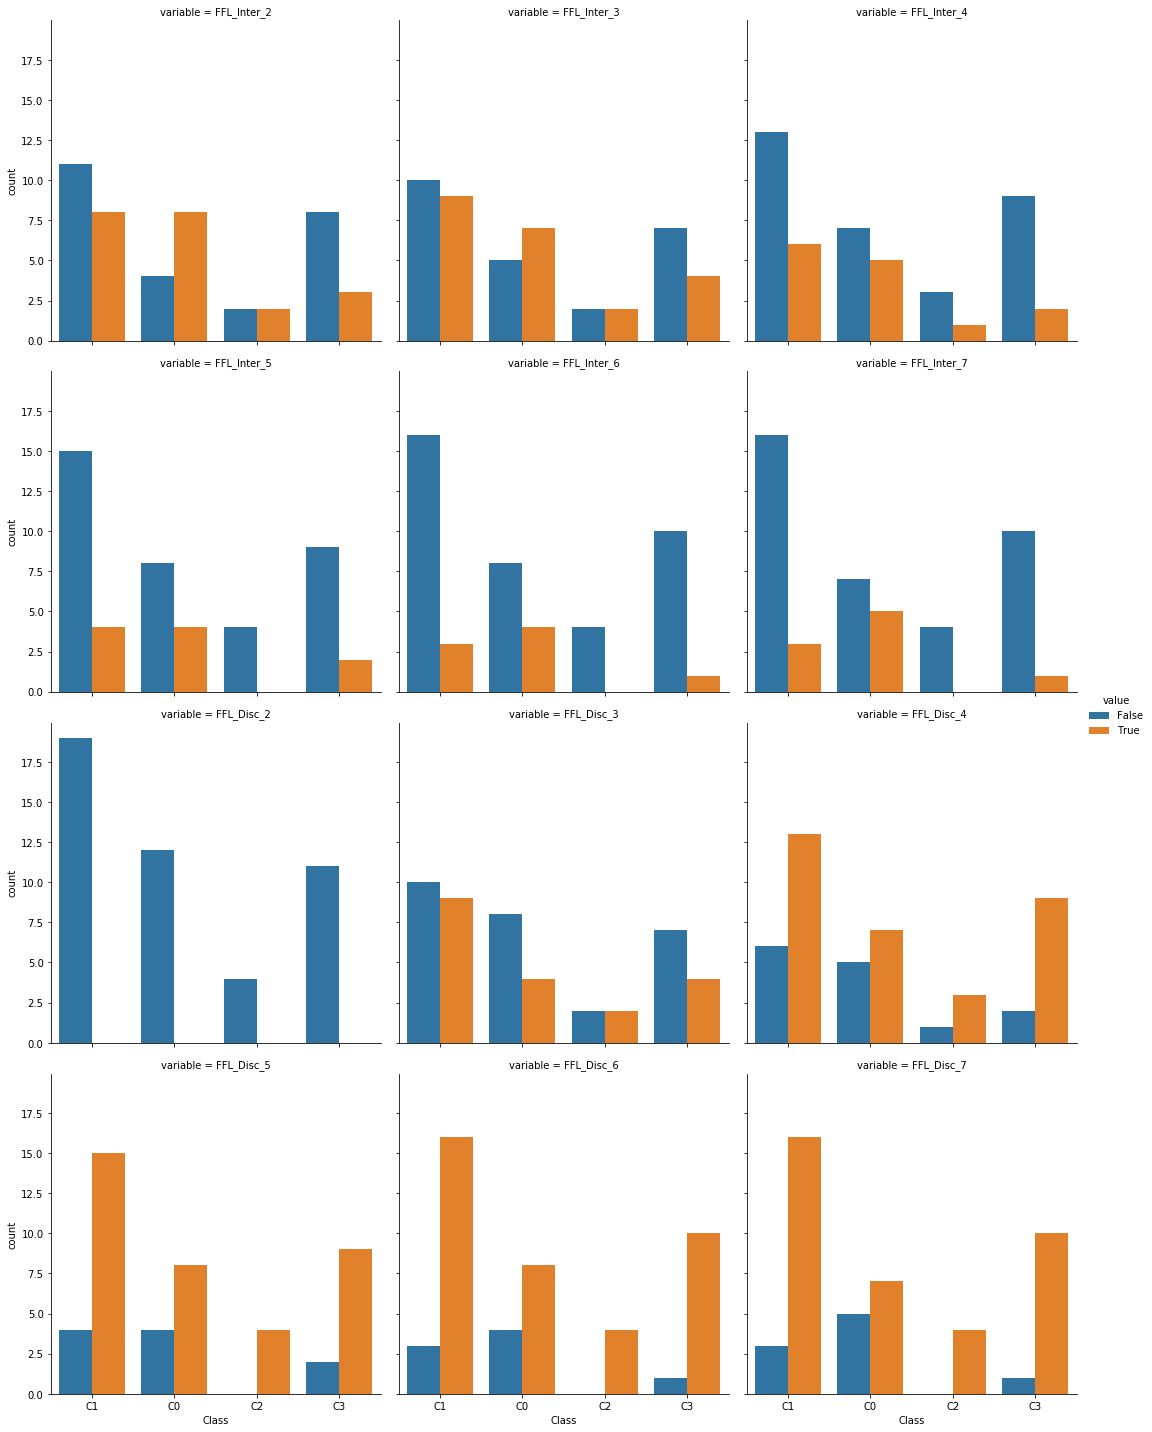

In [55]:
sns.catplot(x='Class', data=test, hue='value', col='variable', kind='count', col_wrap=3)

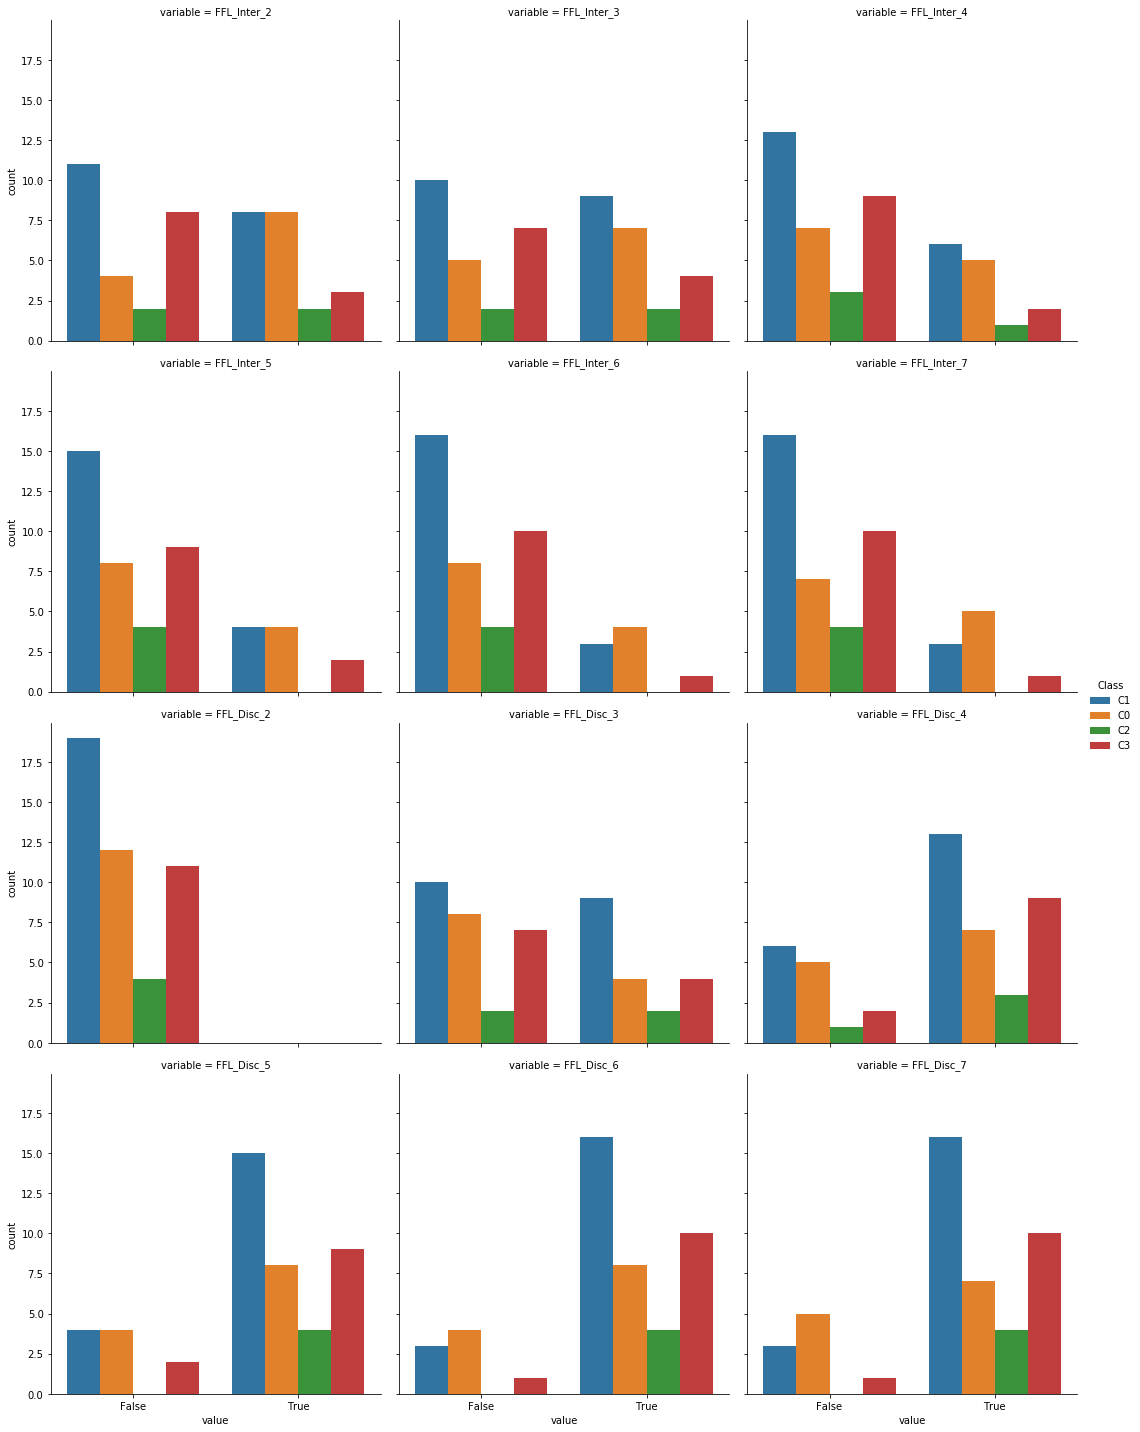

In [82]:
sns.catplot(x='value', data=test, hue='Class', col='variable', kind='count', col_wrap=3)
